In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mandates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential


In [4]:
# loading dataset
data = pd.read_csv('Stock_Price_data_set.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
data.shape

(1009, 7)

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<AxesSubplot:>

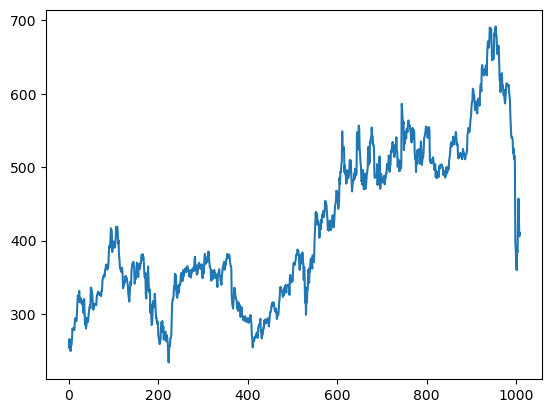

In [8]:
data['Adj Close'].plot()

In [10]:
output_var = pd.DataFrame(data['Adj Close']) 

In [11]:
features = ['Open', 'High', 'Low', 'Volume']

In [14]:
scaler = MinMaxScaler()
feature_tf = scaler.fit_transform(data[features])
feature_tf = pd.DataFrame(columns = features, data = feature_tf, index = data.index)
feature_tf.head()

,Open,High,Low,Volume
0,0.061253,0.038304,0.041331,0.186150
1,0.030059,0.035640,0.030273,0.198264
2,0.071243,0.048408,0.072770,0.135690
3,0.072334,0.037683,0.041265,0.141320
4,0.043474,0.011436,0.010729,0.272902


In [15]:
timesplit = TimeSeriesSplit(n_splits=10) 
for train_index, test_index in timesplit.split(feature_tf):
        X_train, X_test = feature_tf[:len(train_index)], feature_tf[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [16]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [17]:
X_train.shape

(918, 1, 4)

In [18]:
X_test.shape

(91, 1, 4)

Building Model & Testing Accuracy 

In [25]:
model = Sequential()

model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))
lstm.compile(loss='mean_absolute_error', optimizer='adam')


In [26]:
model = lstm.fit(X_train, y_train, epochs = 150, batch_size = 8, verbose = 1)

Epoch 1/150
115/115 [==============================] - 1s 1ms/step - loss: 4.1944
Epoch 2/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1888
Epoch 3/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1923
Epoch 4/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1926
Epoch 5/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1990
Epoch 6/150
115/115 [==============================] - 0s 1ms/step - loss: 4.2028
Epoch 7/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1937
Epoch 8/150
115/115 [==============================] - 0s 2ms/step - loss: 4.1734
Epoch 9/150
115/115 [==============================] - 0s 1ms/step - loss: 4.2005
Epoch 10/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1990
Epoch 11/150
115/115 [==============================] - 0s 2ms/step - loss: 4.2032
Epoch 12/150
115/115 [==============================] - 0s 2ms/step - loss: 4.1954
Epoch 13/150


115/115 [==============================] - 0s 1ms/step - loss: 4.1344
Epoch 100/150
115/115 [==============================] - 0s 2ms/step - loss: 4.1153
Epoch 101/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1407
Epoch 102/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1187
Epoch 103/150
115/115 [==============================] - 0s 2ms/step - loss: 4.1190
Epoch 104/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1273
Epoch 105/150
115/115 [==============================] - 0s 2ms/step - loss: 4.1217
Epoch 106/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1138
Epoch 107/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1143
Epoch 108/150
115/115 [==============================] - 0s 2ms/step - loss: 4.1230
Epoch 109/150
115/115 [==============================] - 0s 1ms/step - loss: 4.1334
Epoch 110/150
115/115 [==============================] - 0s 2ms/step - loss: 4.1161
Epoch 

In [27]:
y_pred = lstm.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [32]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred) 
MAE = metrics.mean_absolute_error(y_test, y_pred) 

In [33]:
MAE, r2 

(5.902622717612468, 0.9917813200156327)

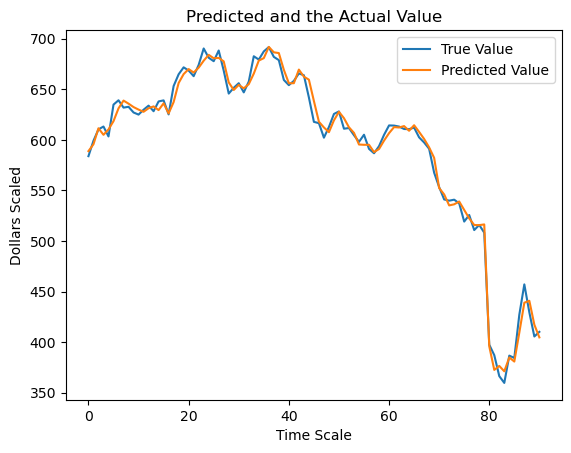

In [34]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title("Predicted and the Actual Value")
plt.xlabel('Time Scale')
plt.ylabel('Dollars Scaled')
plt.legend()
plt.show()